|Points||X||Y|
|---||---||---|
|Point P1||0.40||0.53|
|Point P2||0.22||0.38|
|Point P3||0.35||0.32|
|Point P4||0.26||0.19|
|Point P5||0.08||0.41|
|Point P6||0.45||0.30|

Which two points will form the initial cluster using Hierarchical Clustering approach (consider single linkage)? Based on the initial cluster, provide the updated distance matrix between those two points. Draw the dendrogram – what do you infer?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Create dataframe
data = [[0.40,0.53], [0.22,0.38], [0.35,0.32], [0.26,0.19], [0.08,0.41], [0.45,0.30]]
points = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df = pd.DataFrame(data, columns=['X', 'Y'], index=points)
df

,X,Y
P1,0.40,0.53
P2,0.22,0.38
P3,0.35,0.32
P4,0.26,0.19
P5,0.08,0.41
P6,0.45,0.30


In [3]:
# Lets look at distance matrix
dist = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
dist

,P1,P2,P3,P4,P5,P6
P1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
P2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
P3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
P4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
P5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
P6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


The least distance in the above matrix will merge first. Hence P3 and P6 whose distance being 0.101980 will merge first. In order to arrive at the new updated distance matrix after the initial cluster, we will do the below steps.

1. Update the distance between (P3,P6) to P1

This should be interpreted as calculating the distance between (P3,P1) and distance between (P6,P1) and then taking a minimum of these two distances

In [4]:
min(0.215870, 0.235372)

0.21587

2. Update the distance between (P3,P6) to P2

This should be interpreted as calculating the distance between (P3,P2) and distance between (P6,P2) and then taking a minimum of these two distances

In [5]:
min(0.143178, 0.243516)

0.143178

3. Update the distance between (P3,P6) to P4. (Note that we have skipped the distance with P3 since the distance of a point to itself is zero)

This should be interpreted as calculating the distance between (P3,P4) and distance between (P6,P4) and then taking a minimum of these two distances.

In [6]:
min(0.158114, 0.219545)

0.158114

4. Update the distance between (P3,P6) to P5.

This should be interpreted as calculating the distance between (P3,P5) and distance between (P6,P5) and then taking a minimum of these two distances.

In [7]:
min(0.284605, 0.386005)

0.284605

We will stop here since updating distance between (P3, P6) to P6 can be skipped as the distance of a point to itself is zero.

In [8]:
# Updated Matrix
points = ['P1', 'P2', 'P3,P6', 'P4', 'P5']
upd_dist = pd.DataFrame({'P1' : [0, 0.234307, 0.21587, 0.367696, 0.341760],           #dist(P1,P1),dist(P1,P2),dist(P1,(P3,P6)),dist(P1,P4),dist(P1,P5)
                         'P2' : [0.234307, 0, 0.143178, 0.194165, 0.143178],
                         'P3,P6' : [0.21587, 0.143178, 0, 0.158114, 0.284605],
                         'P4' : [0.367696, 0.194165, 0.158114, 0, 0.284253],
                         'P5' : [0.341760, 0.143178, 0.284605, 0.284253, 0]},
                         index=points)
upd_dist

,P1,P2,"P3,P6",P4,P5
P1,0.000000,0.234307,0.215870,0.367696,0.341760
P2,0.234307,0.000000,0.143178,0.194165,0.143178
"P3,P6",0.215870,0.143178,0.000000,0.158114,0.284605
P4,0.367696,0.194165,0.158114,0.000000,0.284253
P5,0.341760,0.143178,0.284605,0.284253,0.000000


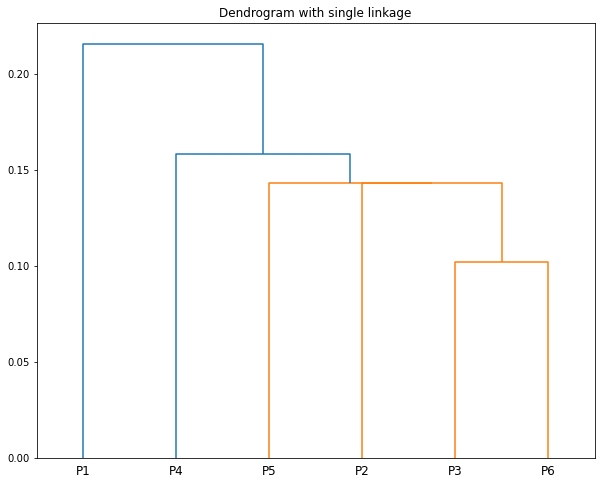

In [9]:
# Plot Dendrogram
plt.figure(figsize=(10,8))
plt.title("Dendrogram with single linkage")
dn = dendrogram(linkage(df[['X','Y']], method='single'), labels=df.index)

We can infer that for (P3, P6) the initial cluster is formed, which correspond to the least distance from the distance matrix with points P3 and P6. Both the analysis and dendrogram give same results.